# Predictive and prescriptive analysis of bank marketing data to optimize customer targeting for commercial bank in Kathmandu.

# Importing libraries

In [584]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tabulate import tabulate

In [585]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tabulate import tabulate

In [586]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tabulate import tabulate

# Reading Dataset (Synthesized dataset using GPT-4.0)

In [ ]:
df = pd.read_csv("Kathmandu_Customer_Dataset.csv")
df = df.dropna()

# Summary statistics and exploration of the dataset

In [588]:
df.describe(include='all')

,age,job,job_type,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,annual_income,y
count,1000.000000,1000,1000,1000,1000,1000,1000.00000,1000,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1.000000e+03,1000
unique,NaN,10,4,3,5,2,NaN,2,2,4,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2
top,NaN,bank_employee,White-collar,married,bachelor,no,NaN,yes,no,NTC,NaN,apr,NaN,NaN,NaN,NaN,not_contacted,NaN,no
freq,NaN,111,510,366,324,962,NaN,687,747,262,NaN,103,NaN,NaN,NaN,NaN,589,NaN,863
mean,44.384000,NaN,NaN,NaN,NaN,NaN,81026.31500,NaN,NaN,NaN,16.468000,NaN,632.524000,3.065000,0.778000,2.410000,NaN,3.230436e+05,NaN
std,15.558168,NaN,NaN,NaN,NaN,NaN,39865.03925,NaN,NaN,NaN,8.983411,NaN,340.687904,1.406682,4.416585,1.704936,NaN,2.310097e+05,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,-33258.00000,NaN,NaN,NaN,1.000000,NaN,30.000000,1.000000,-1.000000,0.000000,NaN,1.296000e+04,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,54864.25000,NaN,NaN,NaN,9.000000,NaN,343.750000,2.000000,-1.000000,1.000000,NaN,1.576800e+05,NaN
50%,44.500000,NaN,NaN,NaN,NaN,NaN,81204.00000,NaN,NaN,NaN,17.000000,NaN,648.500000,3.000000,-1.000000,2.000000,NaN,2.808000e+05,NaN
75%,58.000000,NaN,NaN,NaN,NaN,NaN,106762.25000,NaN,NaN,NaN,24.000000,NaN,943.000000,4.000000,-1.000000,4.000000,NaN,4.320000e+05,NaN


# Exploratory Data Analysis (EDA)

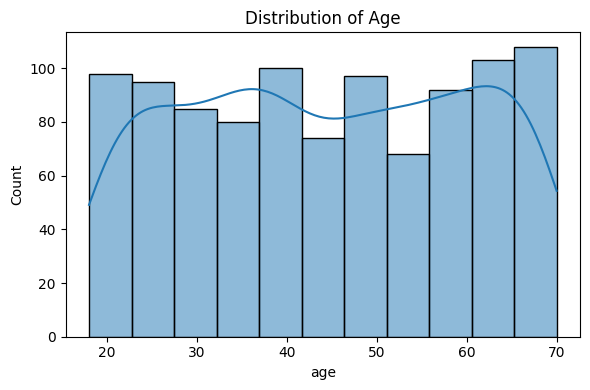

In [589]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

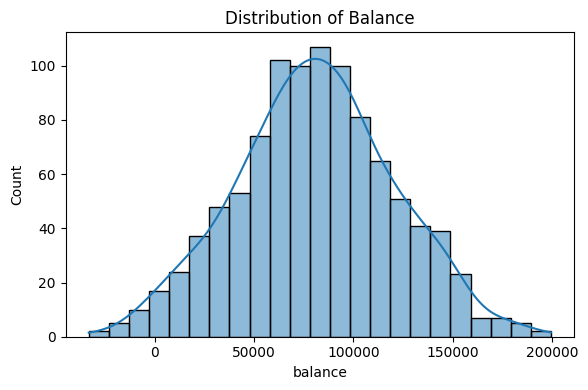

In [590]:
plt.figure(figsize=(6, 4))
sns.histplot(df['balance'], kde=True)
plt.title('Distribution of Balance')
plt.tight_layout()
plt.show()

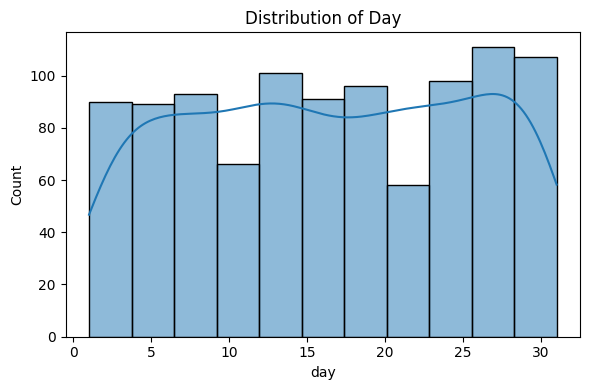

In [591]:
plt.figure(figsize=(6, 4))
sns.histplot(df['day'], kde=True)
plt.title('Distribution of Day')
plt.tight_layout()
plt.show()

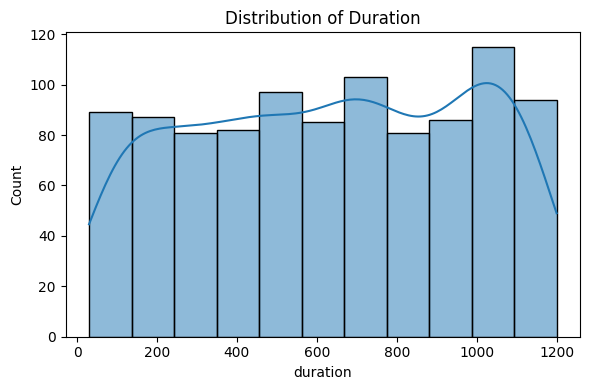

In [592]:
plt.figure(figsize=(6, 4))
sns.histplot(df['duration'], kde=True)
plt.title('Distribution of Duration')
plt.tight_layout()
plt.show()

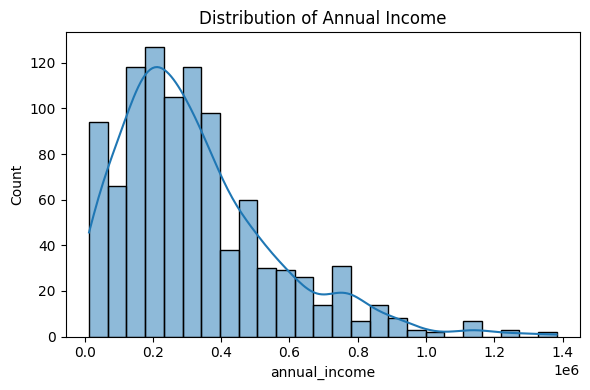

In [593]:
plt.figure(figsize=(6, 4))
sns.histplot(df['annual_income'], kde=True)
plt.title('Distribution of Annual Income')
plt.tight_layout()
plt.show()

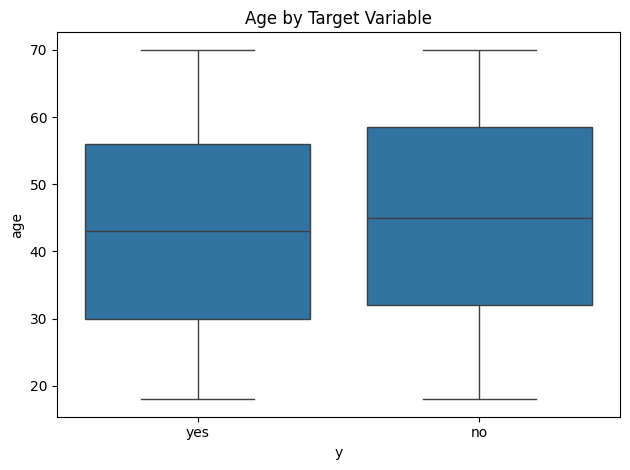

In [594]:
sns.boxplot(x='y', y='age', data=df)
plt.title('Age by Target Variable')
plt.tight_layout()
plt.show()

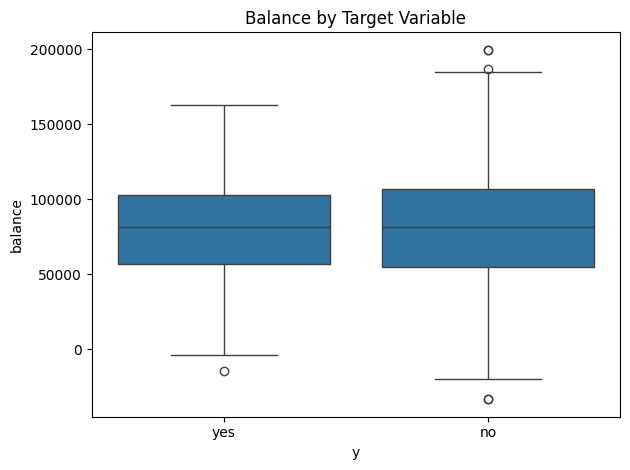

In [595]:
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance by Target Variable')
plt.tight_layout()
plt.show()

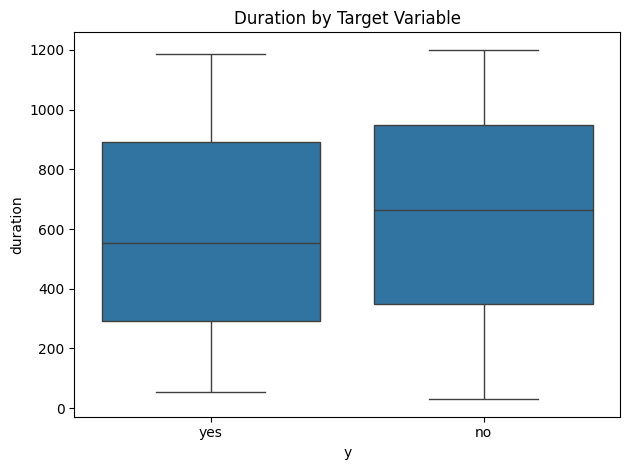

In [596]:
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration by Target Variable')
plt.tight_layout()
plt.show()

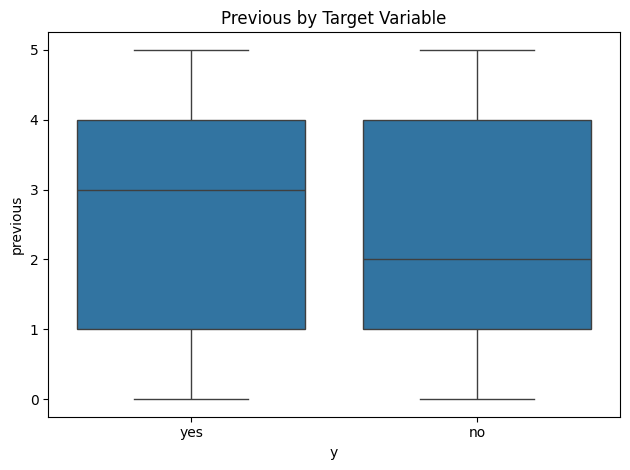

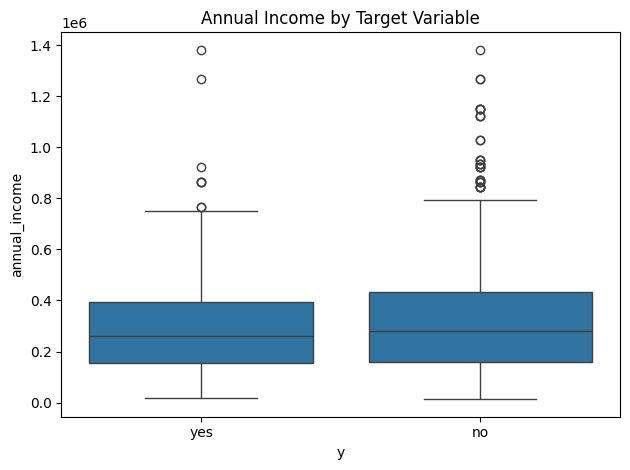

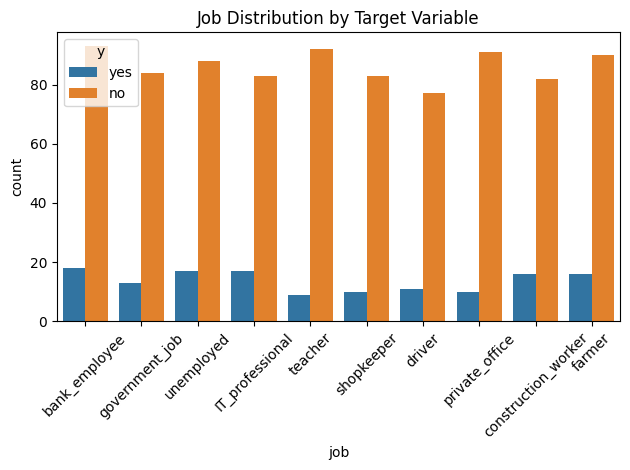

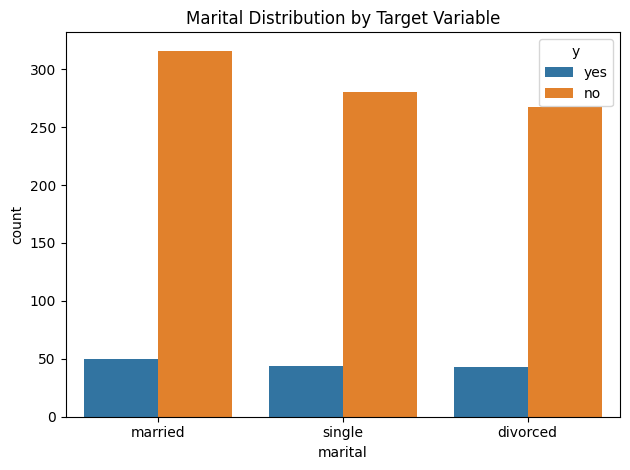

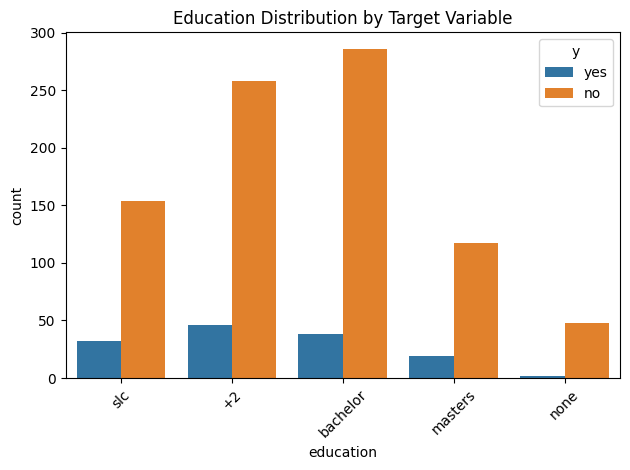

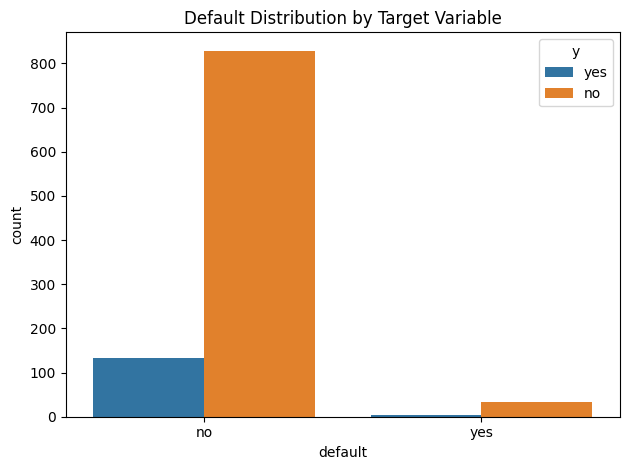

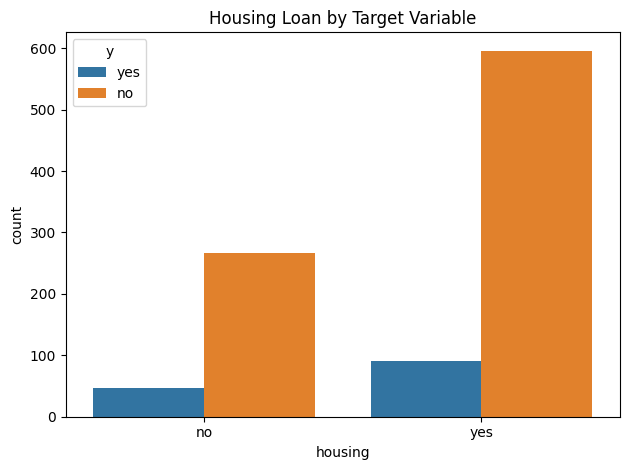

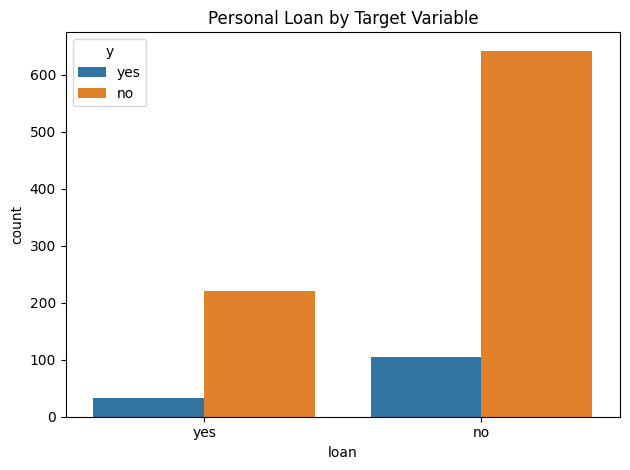

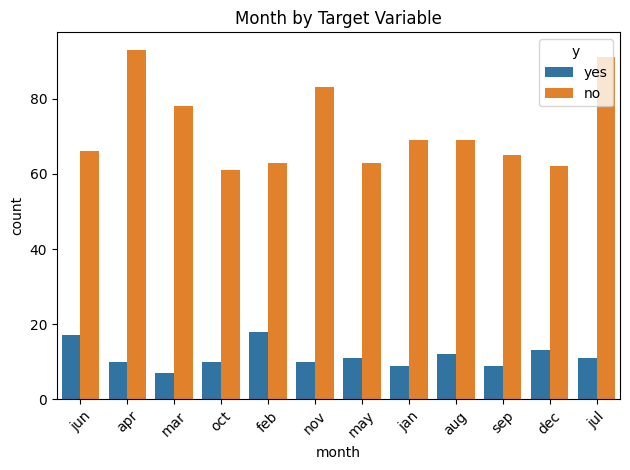

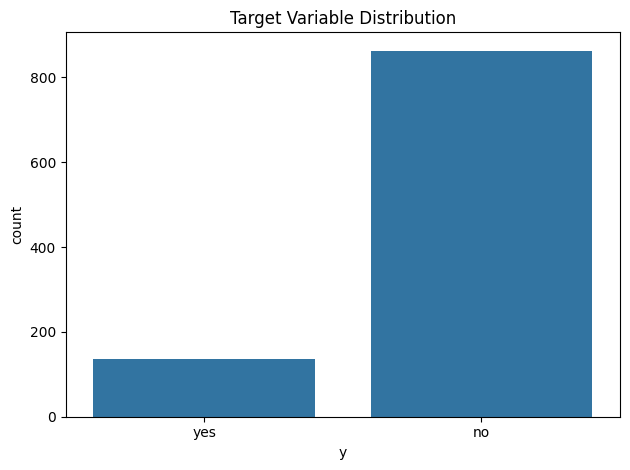

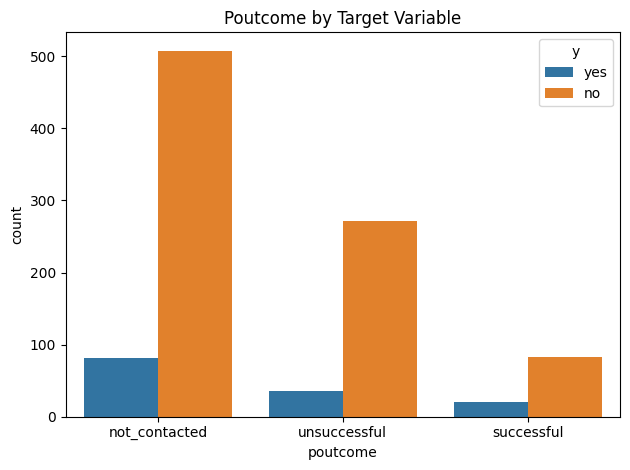

In [597]:
sns.boxplot(x='y', y='previous', data=df)
plt.title('Previous by Target Variable')
plt.tight_layout()
plt.show()

sns.boxplot(x='y', y='annual_income', data=df)
plt.title('Annual Income by Target Variable')
plt.tight_layout()
plt.show()

sns.countplot(x='job', hue='y', data=df)
plt.title('Job Distribution by Target Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(x='marital', hue='y', data=df)
plt.title('Marital Distribution by Target Variable')
plt.tight_layout()
plt.show()

sns.countplot(x='education', hue='y', data=df)
plt.title('Education Distribution by Target Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(x='default', hue='y', data=df)
plt.title('Default Distribution by Target Variable')
plt.tight_layout()
plt.show()

sns.countplot(x='housing', hue='y', data=df)
plt.title('Housing Loan by Target Variable')
plt.tight_layout()
plt.show()

sns.countplot(x='loan', hue='y', data=df)
plt.title('Personal Loan by Target Variable')
plt.tight_layout()
plt.show()

sns.countplot(x='month', hue='y', data=df)
plt.title('Month by Target Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.tight_layout()
plt.show()

sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Poutcome by Target Variable')
plt.tight_layout()
plt.show()

# Separating target variable and features

In [598]:
X = df.drop(columns=['y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Checking what features are more related to target variable

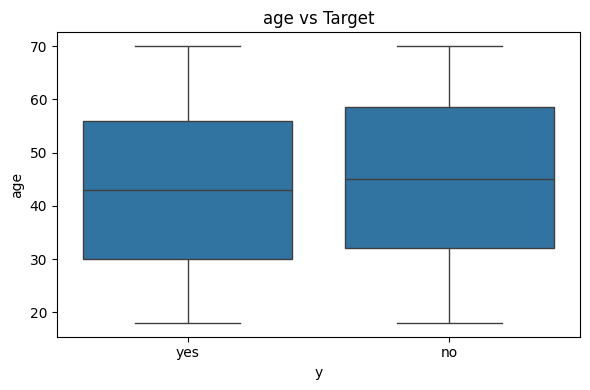

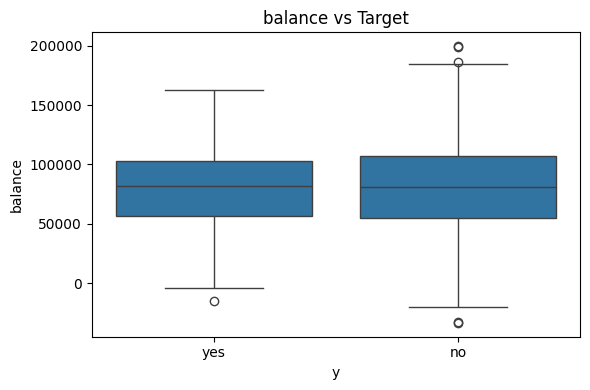

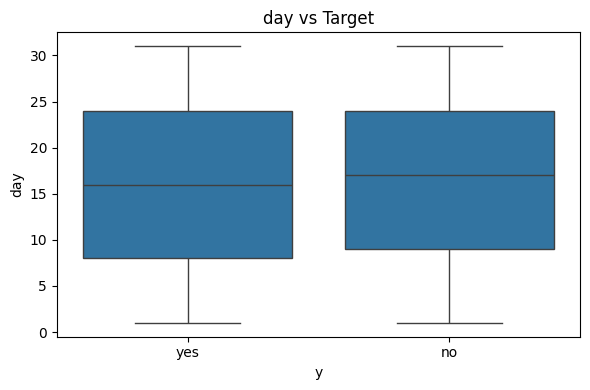

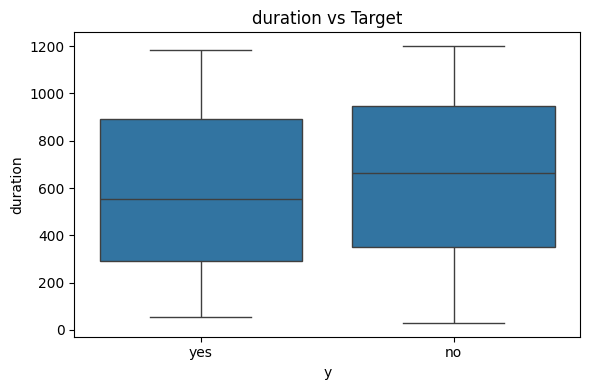

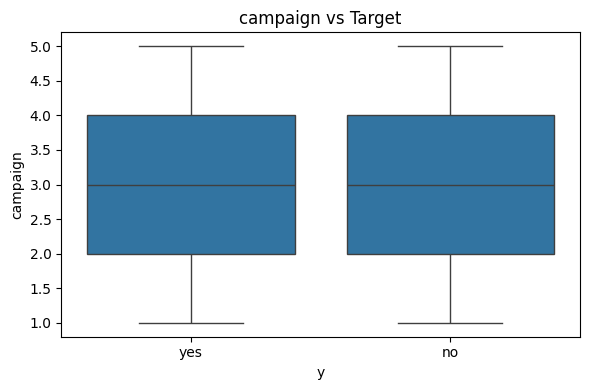

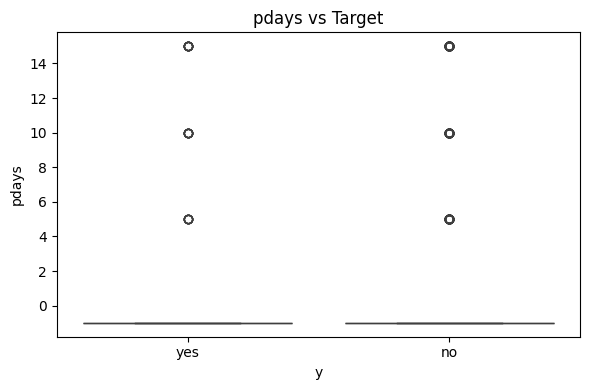

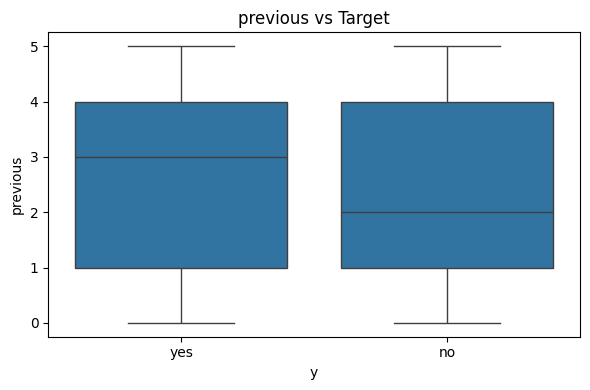

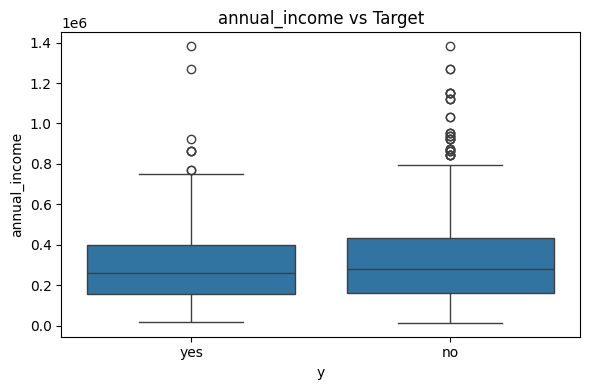

In [599]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['y'], y=df[col])
    plt.title(f'{col} vs Target')
    plt.tight_layout()
    plt.show()

# Standardize (scalar)

In [600]:
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Checking for imbalance

Class Distribution:
 y
0    863
1    137
Name: count, dtype: int64


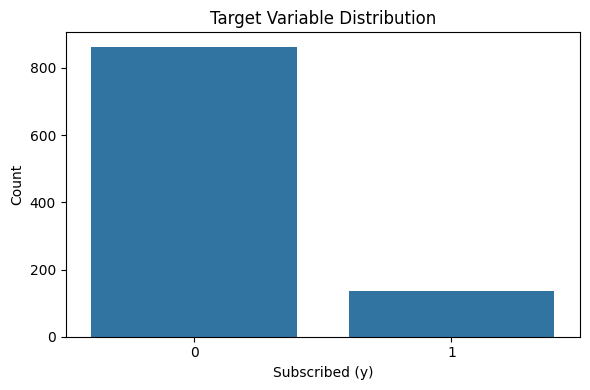


Imbalance Ratio: 0.16


In [601]:
class_counts = y.value_counts()
print("Class Distribution:\n", class_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")


# SMOTE

In [602]:
categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

X_encoded = preprocessor.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


### Feature Selection and Separation

In [603]:
features = ['age', 'education', 'annual_income', 'job']
df_subset = df[features].copy()

categorical = [col for col in features if df[col].dtype == 'object']
numerical = [col for col in features if col not in categorical]

### Encoding and Scaling

In [604]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', StandardScaler(), numerical)
])

X = preprocessor.fit_transform(df_subset)

### Finding Optimal Number of Clusters (k)

In [605]:
wcss = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

### Plotting Evaluation Graphs

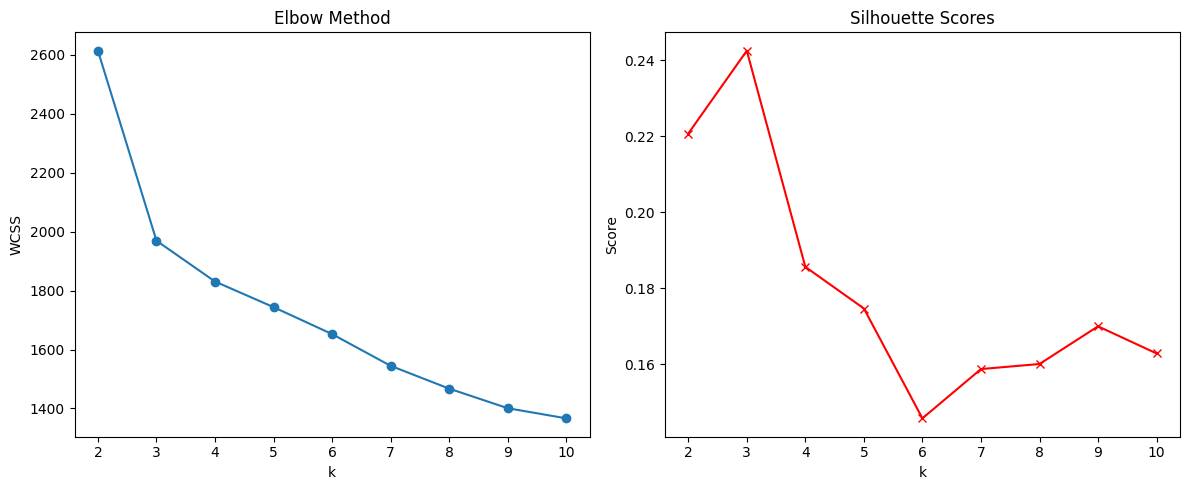

In [606]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='x', color='red')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

### Clustering using the optimal value=3

In [607]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

### Cluster Analysis (Descriptive Stats)

In [608]:
education_map = {
    0: 'High School',
    1: 'Bachelor',
    2: 'Master',
    3: 'PhD'
}

job_map = {
    0: 'Student',
    1: 'Self-employed',
    2: 'Blue-collar',
    3: 'White-collar',
    4: 'Government',
    5: 'Business',
    6: 'Retired'
}

def decode_closest(avg_code, code_map):
    closest = min(code_map.keys(), key=lambda x: abs(x - avg_code))
    return code_map[closest]

df['education_encoded'] = df['education'].astype('category').cat.codes
df['job_encoded'] = df['job'].astype('category').cat.codes

cluster_summary = df.groupby('Cluster')[['age', 'annual_income', 'education_encoded', 'job_encoded']].mean().reset_index()

cluster_summary['education_level'] = cluster_summary['education_encoded'].apply(lambda x: decode_closest(x, education_map))
cluster_summary['job_type'] = cluster_summary['job_encoded'].apply(lambda x: decode_closest(x, job_map))

cluster_summary['annual_income'] = cluster_summary['annual_income'].apply(lambda x: f"NPR {int(x):,}")

final_summary = cluster_summary[['Cluster', 'age', 'annual_income', 'education_level', 'job_type']]
print(final_summary)

   Cluster        age annual_income education_level      job_type
0        0  45.680000   NPR 690,174        Bachelor  White-collar
1        1  58.119221   NPR 239,594        Bachelor      Business
2        2  29.205656   NPR 222,456          Master      Business


C:\Users\Nitro\AppData\Local\Temp\ipykernel_11304\1391962576.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_labels, y=cluster_counts.values, ax=ax1, palette="viridis")


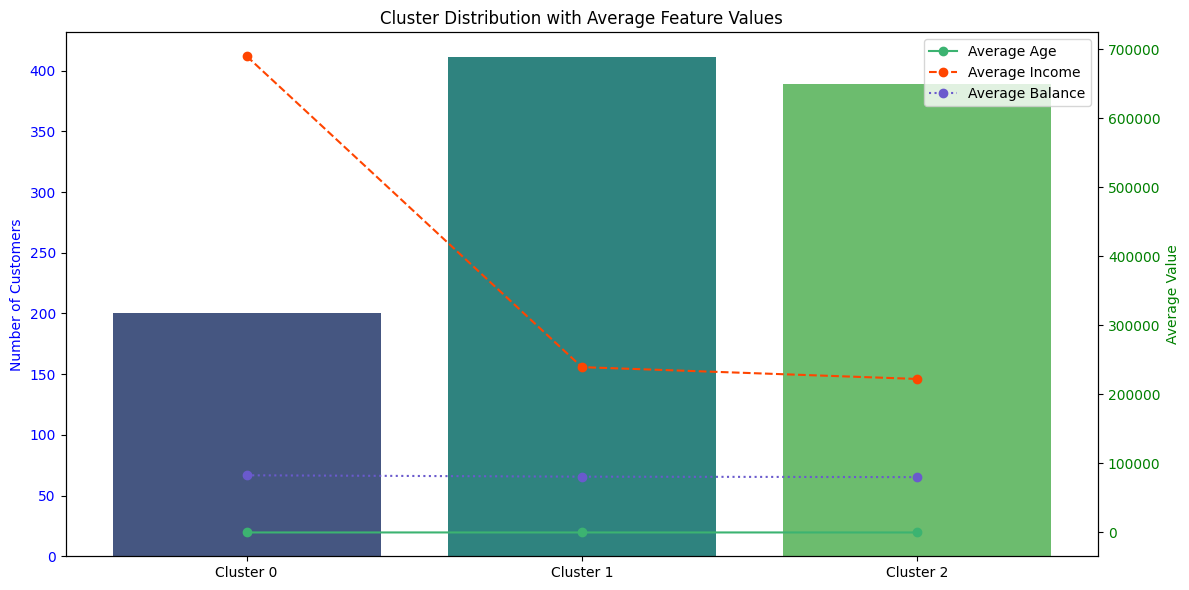

In [609]:
cluster_summary = df.groupby('Cluster').agg({
    'age': 'mean',
    'annual_income': 'mean',
    'balance': 'mean'
}).reset_index()

cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_labels = [f"Cluster {i}" for i in cluster_counts.index]

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=cluster_labels, y=cluster_counts.values, ax=ax1, palette="viridis")
ax1.set_ylabel("Number of Customers", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(cluster_labels, cluster_summary['age'], marker='o', label='Average Age', color='mediumseagreen')
ax2.plot(cluster_labels, cluster_summary['annual_income'], marker='o', linestyle='--', label='Average Income', color='orangered')
ax2.plot(cluster_labels, cluster_summary['balance'], marker='o', linestyle=':', label='Average Balance', color='slateblue')
ax2.set_ylabel("Average Value", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Cluster Distribution with Average Feature Values")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()


C:\Users\Nitro\AppData\Local\Temp\ipykernel_11304\3958682936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2")


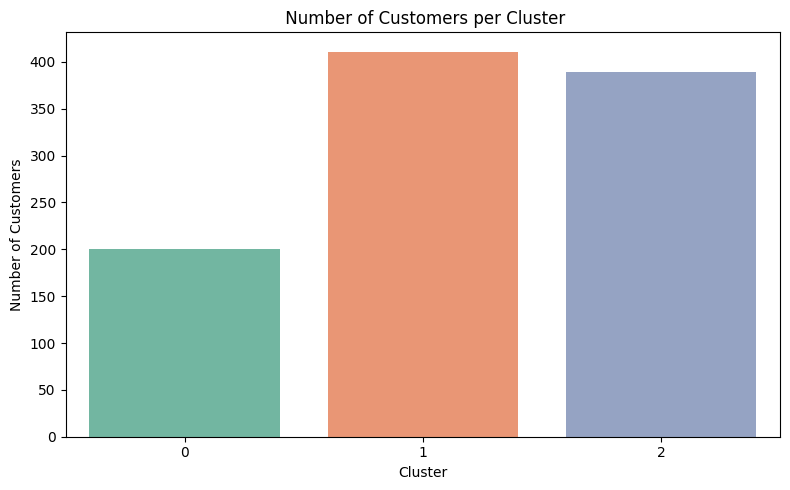

In [610]:
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title(" Number of Customers per Cluster")
plt.tight_layout()
plt.show()


###  Dimensionality Reduction for Visualization

In [611]:
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X)

###  Visualizing Clusters in 2D

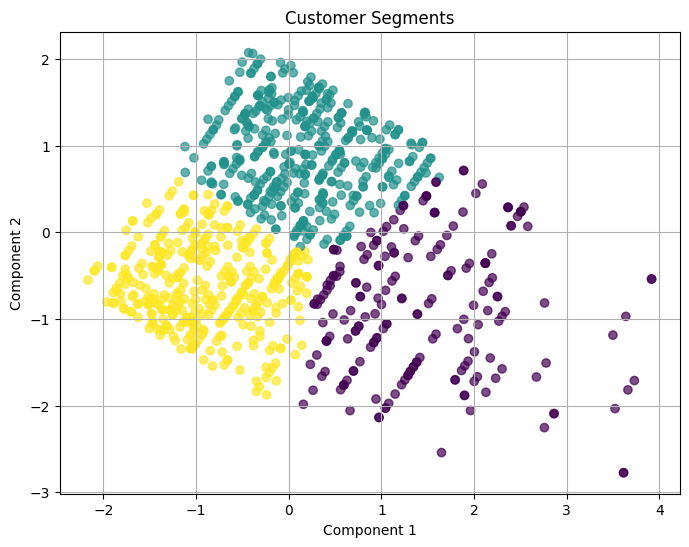

In [612]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

###  Predictive Analysis: Using Clusters as Target Labels
Using the clusters assigned by KMeans as labels and train a classification model to predict them based on features.

In [613]:
y = df['Cluster'] 

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

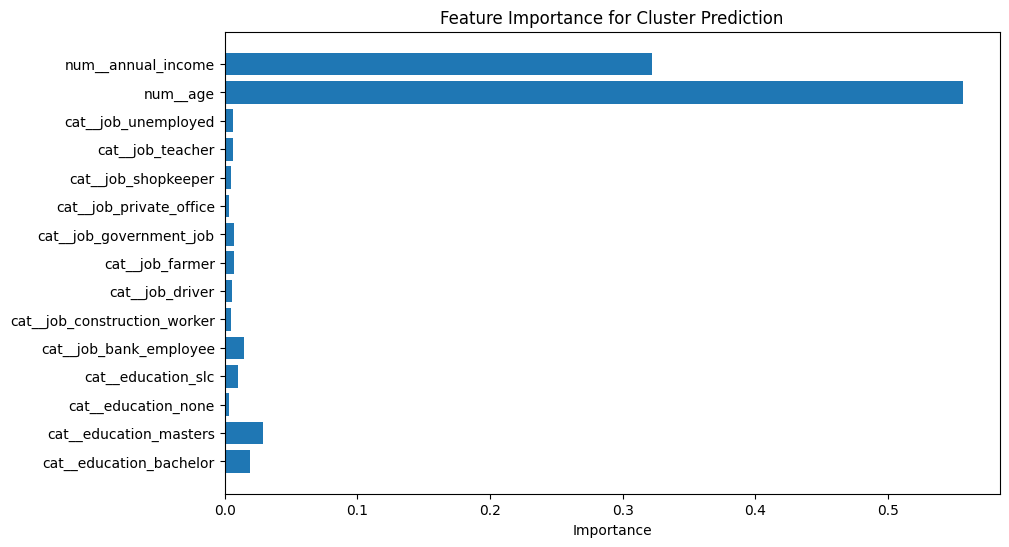

In [615]:
importances = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance for Cluster Prediction")
plt.xlabel("Importance")
plt.show()

# Train-test Split (on SMOTE resampled Data)

In [616]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# Model 1: Logistic Regression

In [617]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Evaluation: Logistic Regression

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       173
           1       0.61      0.63      0.62       173

    accuracy                           0.62       346
   macro avg       0.62      0.62      0.62       346
weighted avg       0.62      0.62      0.62       346

F1 Score: 0.6210826210826211


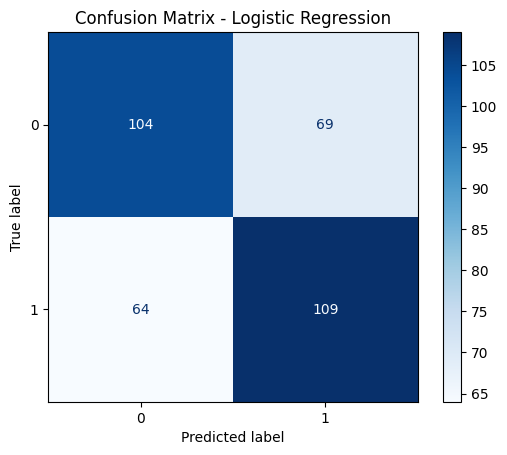

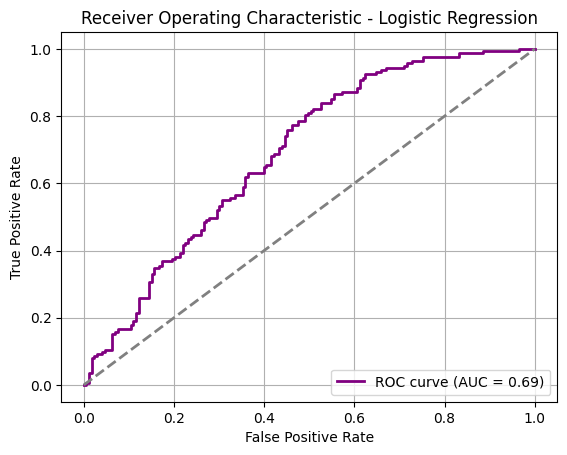

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))

f1_logreg = f1_score(y_test, y_pred_logreg)
print("F1 Score:", f1_logreg)

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

y_prob_logreg = logreg.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Model 2: Random Forest

In [619]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation: Random Forest

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       173
           1       0.99      0.85      0.92       173

    accuracy                           0.92       346
   macro avg       0.93      0.92      0.92       346
weighted avg       0.93      0.92      0.92       346

F1 Score: 0.9158878504672897


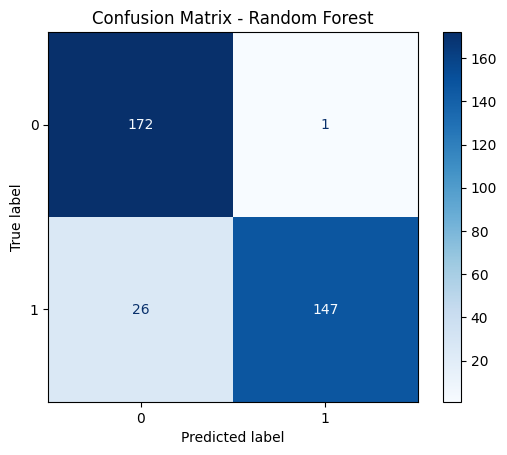

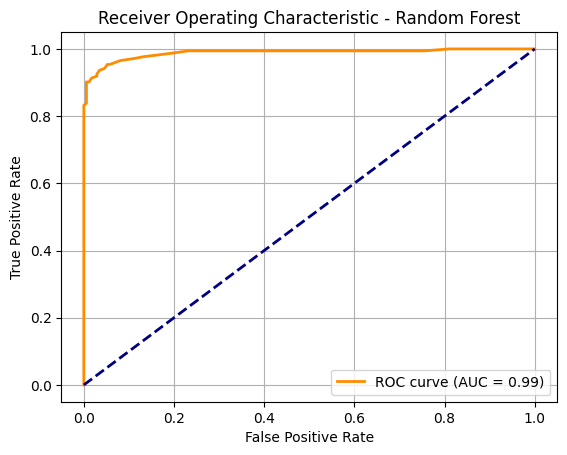

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

y_pred_rf = rf.predict(X_test)

y_prob_rf = rf.predict_proba(X_test)[:, 1]  

print(classification_report(y_test, y_pred_rf))

f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1_rf)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Model 3: K-Nearest Neighbors

In [621]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

## Evaluation: KNN

              precision    recall  f1-score   support

           0       0.99      0.42      0.59       173
           1       0.63      0.99      0.77       173

    accuracy                           0.71       346
   macro avg       0.81      0.71      0.68       346
weighted avg       0.81      0.71      0.68       346

F1 Score: 0.7713004484304933


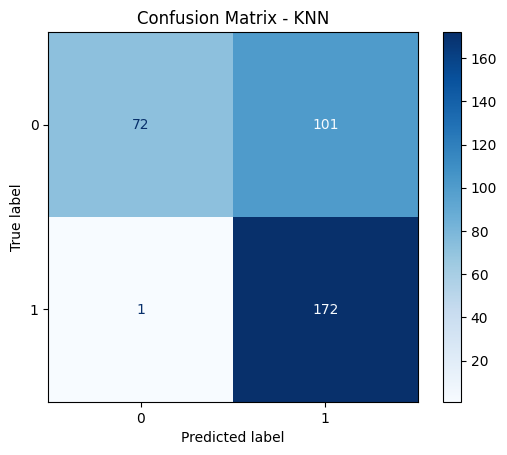

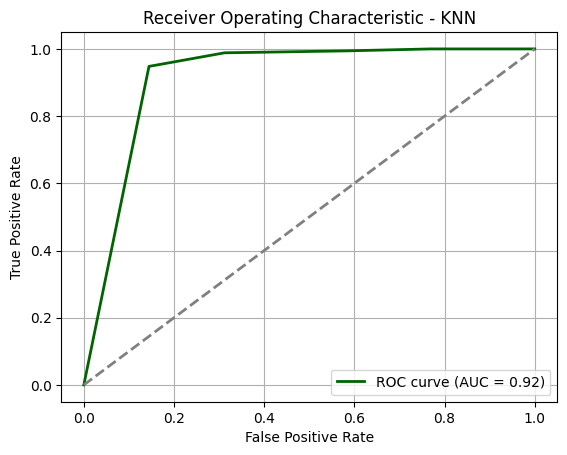

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1_knn)

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()

y_prob_knn = knn.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [623]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tabulate import tabulate

# Saving the Best Performing Model based on F1 Scores (Random Forest)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

df = pd.read_csv('Corrected_Kathmandu_Income_Dataset.csv').dropna()
X = df.drop(columns=['y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
])

X_encoded = preprocessor.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)